In [5]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plots

matplotlib.style.use('ggplot')

In [6]:
env = BlackjackEnv()

In [13]:
# try with different alpha

def td_prediction(policy, env, num_episodes, alpha=1.0, discount_factor=1.0):
    """
    Temporal Difference (TD(0)) prediction algorithm. Calculates the value function
    for a given policy using sampling with online update of value function.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for episode in range(num_episodes):
        state = env.reset()
        for t in range(1000):
            # sample action from the policy
            action = policy(state)
            
            # environments' effects after taking action
            next_state, reward, done, _ = env.step(action)
            
            
            td_error = reward + (discount_factor * V[next_state]) - V[state]
                
            # online update value function
            V[state] = V[state] + alpha * td_error
            if done:
                break
                
            state = next_state

    return V

In [14]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

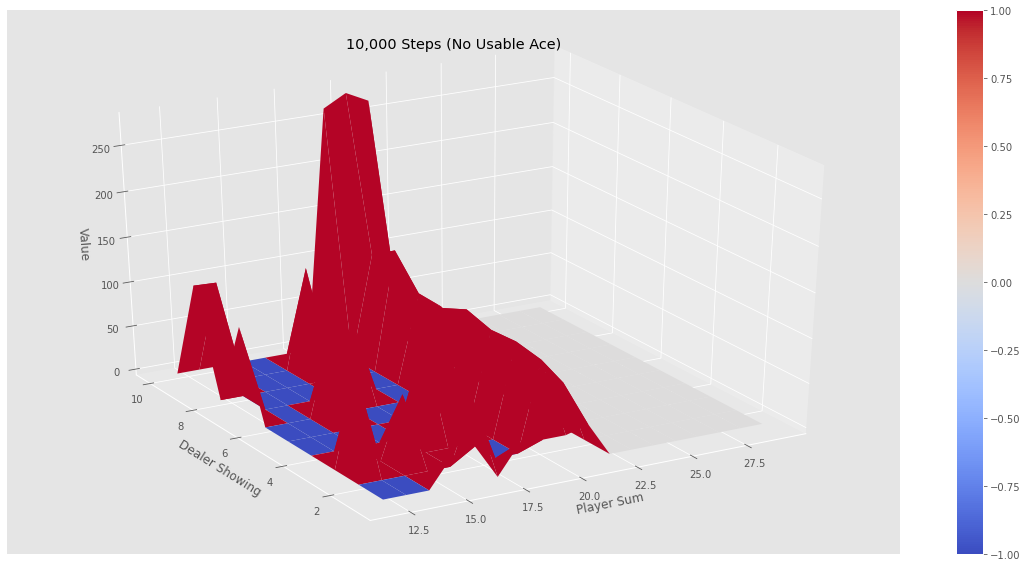

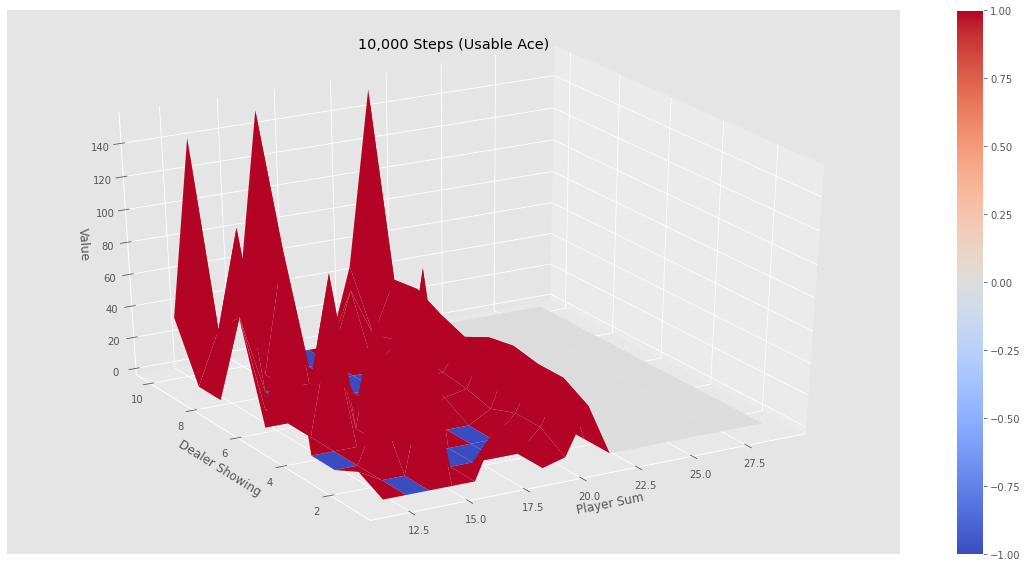

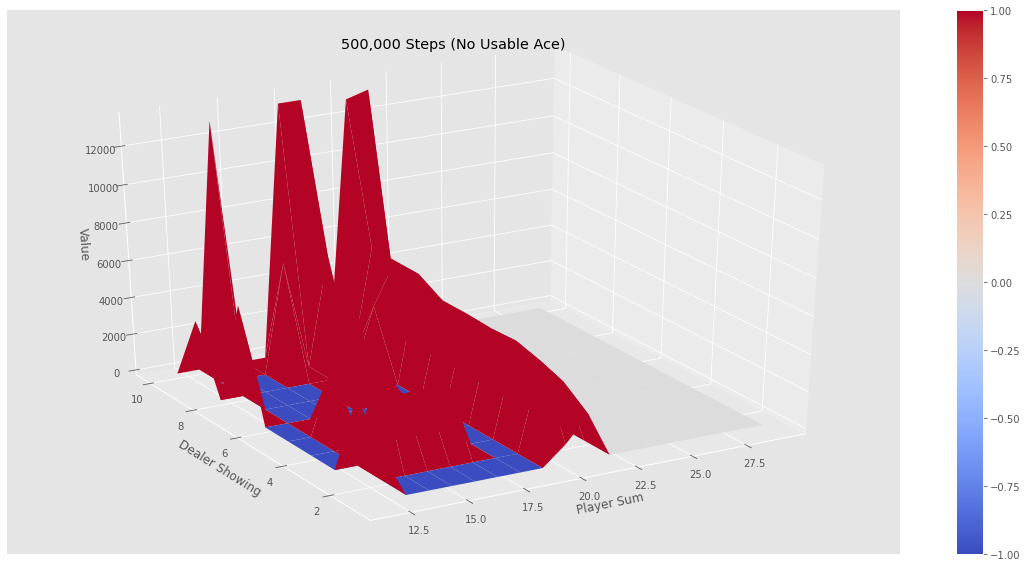

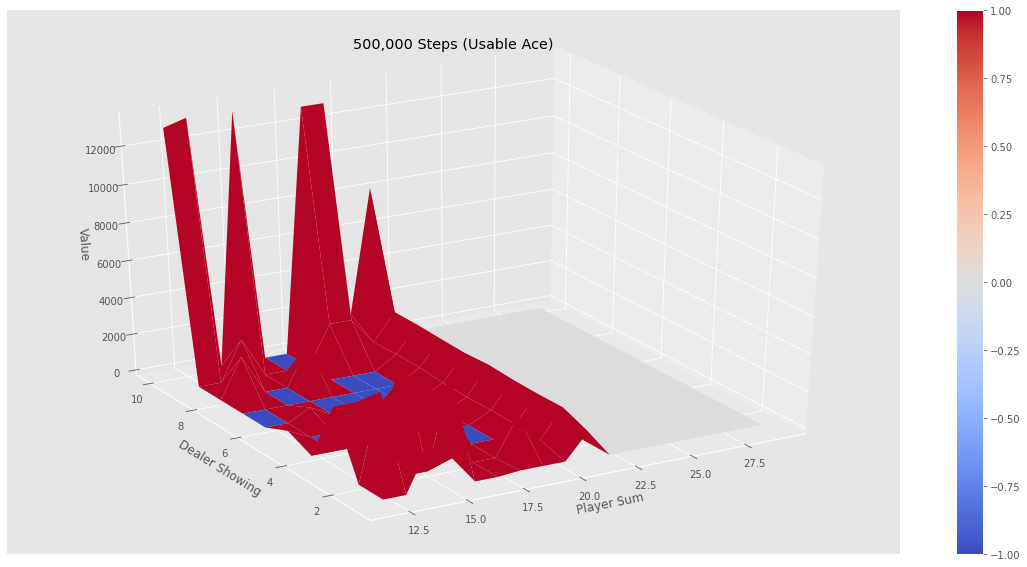

In [15]:
V_10k = td_prediction(sample_policy, env, num_episodes=10000)
plots.plot_value_function(V_10k, title="10,000 Steps")

V_500k = td_prediction(sample_policy, env, num_episodes=500000)
plots.plot_value_function(V_500k, title="500,000 Steps")